In [1]:
#import necessary libraries
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn

In [2]:
#the data set is available in the sklearn python module
from sklearn.datasets import load_boston
boston = load_boston()

In [3]:
#the dataset is a library 
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR'])

In [4]:
boston.data.shape

(506, 13)

In [5]:
#printing the feature names
print (boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [6]:
#I have 506 instances/rows and 13 attributes/columns. 
#The goal is to predict the  housing prices in boston region using the features given.
print(boston.DESCR)
#DESCR is part of the library keys


Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [7]:
#converting boston data to pandas dataframe
bost = pd.DataFrame(boston.data)
bost.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [8]:
#the column numbers need to be replaced with the approptiate column names
bost.columns = boston.feature_names
bost.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [9]:
#boston target key contains the house prices
boston.target[:5]

array([24. , 21.6, 34.7, 33.4, 36.2])

In [10]:
#adding it to the dataframe
bost['prices']=boston.target

In [11]:
bost.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,prices
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [12]:
from sklearn.linear_model import LinearRegression
X = bost.drop('prices', axis = 1)

#create a linear regression object
lm = LinearRegression()
lm.fit(boston.data, boston.target)
Y = lm.predict(X)
lm.score(X, Y) #R^2 value

1.0

In [13]:
print('Estimated intercept coefficients: ', lm.intercept_)

Estimated intercept coefficients:  36.49110328036198


In [14]:
print('Number of coefficients: ', len(lm.coef_))

Number of coefficients:  13


In [15]:
#create a new dataframe 
new = pd.DataFrame(list(zip(X.columns,lm.coef_)),columns = ['features','estimated coef'])
#list is used since python 3 zip returns an iterator

In [16]:
print(new)

   features  estimated coef
0      CRIM       -0.107171
1        ZN        0.046395
2     INDUS        0.020860
3      CHAS        2.688561
4       NOX      -17.795759
5        RM        3.804752
6       AGE        0.000751
7       DIS       -1.475759
8       RAD        0.305655
9       TAX       -0.012329
10  PTRATIO       -0.953464
11        B        0.009393
12    LSTAT       -0.525467


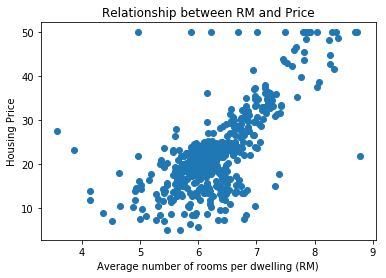

In [17]:
#plotting housing prices vs RM because it has a high correlation to it. 
plt.scatter(bost.RM,bost.prices)
plt.ylabel("Housing Price")
plt.xlabel("Average number of rooms per dwelling (RM)")
plt.title("Relationship between RM and Price")
plt.show()

You can see there is a positive correlation

Text(0.5,1,'Prices vs Predicted Prices: $Y_i$ vs $\\hat{Y}_i$ ')

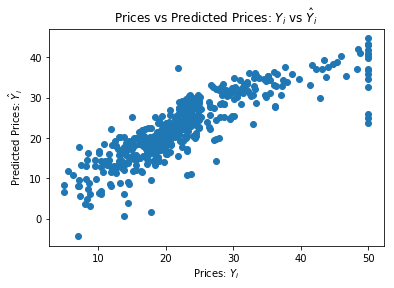

In [18]:
#predicting prices
plt.scatter(bost.prices,lm.predict(X))
plt.ylabel("Predicted Prices: $\hat{Y}_i$")
plt.xlabel("Prices: $Y_i$")
plt.title("Prices vs Predicted Prices: $Y_i$ vs $\hat{Y}_i$ ")

As you can see there is some error in the higher ranged prices

In [19]:
#calculating Mean Square error
MSE = np.mean((lm.predict(X) - bost.prices)**2)
print(MSE)

21.8977792176875


In [20]:
lm=LinearRegression()
lm.fit(X [['PTRATIO']],bost.prices)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [21]:
msePTR=np.mean((bost.prices - lm.predict(X[['PTRATIO']]))**2)
print(msePTR)

62.65220001376927


The mean square error increased which shows one feature is not a good way to predict housing prices.

In [22]:
#training and validating data
X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(X, bost.prices, test_size=0.33, random_state = 5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(339, 13)
(167, 13)
(339,)
(167,)


In [23]:
#build a linear regression model using  the train/test data sets
lm = LinearRegression()
lm.fit(X_train,Y_train)
pred_train = lm.predict(X_train)
pred_test = lm.predict(X_test)

In [24]:
#calculate the mean squared error for training and test data
print("Fit a model X_train and calculate MSE with Y_train: ")
np.mean((Y_train - lm.predict(X_train))**2)

Fit a model X_train and calculate MSE with Y_train: 


19.546758473534656

In [25]:
print("Fit a model X_train and calculate MSE with X_test and Y_test: ")
np.mean((Y_test - lm.predict(X_test))**2)

Fit a model X_train and calculate MSE with X_test and Y_test: 


28.541367275618633

Text(0,0.5,'Residuals')

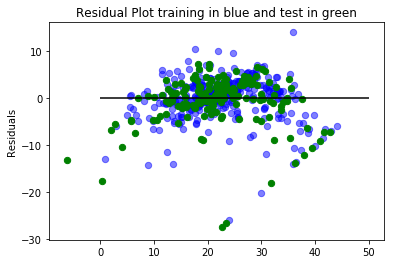

In [26]:
#residual plots
plt.scatter(lm.predict(X_train), lm.predict(X_train)-Y_train, c='b', s=40, alpha=0.5)
plt.scatter(lm.predict(X_test), lm.predict(X_test) - Y_test, c='g', s=40)
plt.hlines(y = 0, xmin = 0, xmax = 50)
plt.title('Residual Plot training in blue and test in green')
plt.ylabel('Residuals')